# Propuesta de Proyecto: EDA con Python
## La Ventaja Local en el Fútbol Europeo

**Nombre del Estudiante:** Sebasian Campos Gonzalez

**Fecha:** 20 de junio de 2025

## Nombre y Fuente del Dataset Seleccionado

* **Nombre:** European Soccer Database (Base de Datos de Fútbol Europeo)
* **Fuente:** [Kaggle: European Soccer Database](https://www.kaggle.com/datasets/hugomathien/soccer)

# Contexto Detallado del Tema

En el mundo del fútbol, una de las creencias más arraigadas entre aficionados, analistas y profesionales es el poder del **"factor local"**. Se asume que jugar en el propio estadio, con el rugido de la afición, la familiaridad del terreno de juego y la reducción del estrés por viajes, otorga una ventaja significativa sobre el equipo visitante. Pero, ¿es esta intuición realmente una ventaja estadística? ¿Cómo se traduce en resultados concretos de partidos? Y, ¿es esta ventaja consistente o varía entre las prestigiosas ligas de Europa?

Este proyecto de **Análisis Exploratorio de Datos (EDA)** se sumergirá en la vasta información de la Base de Datos de Fútbol Europeo para explorar a fondo esta premisa. Nos enfocaremos en cuantificar la influencia de jugar en casa, examinando cómo impacta en las victorias locales, los empates y las victorias visitantes. Iremos más allá de la simple afirmación para determinar si la ventaja de local es una constante en todas las ligas europeas o si existen diferencias notables entre ellas. Por ejemplo, ¿el público inglés en la Premier League ejerce una presión mayor que el alemán en la Bundesliga para favorecer a su equipo local?

Al desentrañar estos patrones, buscaremos ofrecer una comprensión más profunda y basada en datos de un aspecto fundamental del fútbol moderno. Este análisis proporcionará una visión clara sobre si el "jugador número 12" (la afición local) es verdaderamente una fuerza decisiva en el campo de juego.

### Recursos Visuales para el Contexto:

* **Ejemplo de cómo puede influenciar la afición:** [Video: Se hace sentir LA 12 en el CAMP NOU](https://www.youtube.com/watch?v=FWbSZK65gEM)
* **Imágenes:**  

 ![Estadio lleno y afición](https://a3.espncdn.com/combiner/i?img=%2Fphoto%2F2024%2F0128%2Fr1283442_1296x729_16%2D9.jpg)
    
    ![Celebración de un gol decisivo](https://cdn2.mediotiempo.com/uploads/media/2023/02/14/jugadores-milan-celebrando-gol-decisivo.jpg)



## Número de Observaciones y Atributos Relevantes

Este dataset se presenta como una base de datos SQLite (\`database.sqlite\`). Para nuestro enfoque, nos centraremos principalmente en la tabla \`Match\` (Partidos), que contiene la información esencial para las preguntas que queremos responder. También utilizaremos las tablas \`League\` y \`Country\` para clasificar los partidos por liga y país, lo cual es crucial para nuestro análisis comparativo.

* \`Match\` (Partidos):

    * **Número de Observaciones (filas):** Aproximadamente **25,979 partidos**.
    * **Número de Atributos (columnas) Relevantes:** Nos enfocaremos en un subconjunto clave de columnas:

        * \`league\_id\`: Para identificar la liga a la que pertenece el partido.
        * \`home\_team\_goal\`, \`away\_team\_goal\`: Goles marcados por el equipo local y el equipo visitante, respectivamente. Estas columnas son fundamentales para determinar el resultado de cada partido (victoria local, empate, victoria visitante).
* \`League\` (Ligas):

    * **Número de Observaciones (filas):** Aproximadamente **11 ligas únicas**.
    * **Atributos Relevantes:** \`id\`, \`country\_id\`, \`name\` (nombre de la liga).
* \`Country\` (Países):

    * **Número de Observaciones (filas):** Aproximadamente **11 países únicos**.
    * **Atributos Relevantes:** \`id\`, \`name\` (nombre del país).

## Atributos Geográficos y Temporales

El dataset es rico en atributos que, aunque no siempre son geográficos en el sentido estricto de coordenadas, nos permiten realizar un análisis espacial comparativo, y cuenta con atributos temporales relevantes para un EDA más amplio, aunque no serán el foco principal aquí.

* **Atributos Geográficos (Indirectos):**

    * La \`league\_id\` y su vinculación con las tablas \`League\` y \`Country\` nos permite agrupar y comparar los datos de partidos por país/liga (por ejemplo, España para La Liga, Inglaterra para la Premier League, etc.). Esto es fundamental para nuestro objetivo de analizar cómo la ventaja de local varía entre las diferentes ligas europeas.
* **Atributos Temporales:**

    * Aunque no es el foco principal de esta propuesta, la columna \`date\` en la tabla \`Match\` podría permitir en un futuro análisis, observar si la ventaja de local ha cambiado a lo largo de las temporadas cubiertas por el dataset.

## Pregunta a Responder y Tipos de Visualización/Análisis

### 1. ¿Cómo influye el factor "jugar en casa" en el resultado de los partidos en diferentes ligas?

* **Análisis:**

    * Para cada partido, determinaremos el **resultado** (Victoria Local, Empate, Victoria Visitante) comparando \`home\_team\_goal\` y \`away\_team\_goal\`.
    * Calcularemos el **porcentaje de cada uno de estos tres resultados** para el conjunto total de partidos.
    * Posteriormente, desglosaremos estos porcentajes **por cada liga europea**. Esto nos permitirá comparar directamente la proporción de victorias locales, empates y victorias visitantes entre ligas, revelando dónde el factor local es más o menos pronunciado.
    * Además, podemos calcular la **diferencia promedio de goles** entre el equipo local y el visitante para cada liga. Un promedio positivo indicaría que los equipos locales suelen marcar más goles que los visitantes en esa liga.
* **Visualizaciones:**

    * **Gráficos de Barras Apiladas:** Estos gráficos serán ideales para mostrar la distribución porcentual de victorias locales, empates y victorias visitantes para cada una de las ligas europeas. Facilitarán la comparación visual de la "fuerza" del factor local entre ellas.
    * **Gráficos de Barras (Comparativos):** Para mostrar el promedio de goles anotados por el equipo local versus el equipo visitante en cada liga. Esto nos ayudará a cuantificar la "ventaja ofensiva" que el local podría tener.
    * **Gráficos de Barras Simples:** Para visualizar el porcentaje de puntos obtenidos por los equipos locales versus los visitantes en cada liga.

## 1. Ingestión de Datos

En esta sección, procederemos a cargar los datos desde la base de datos SQLite proporcionada por Kaggle. Utilizaremos la biblioteca `sqlite3` para conectarnos a la base de datos y `pandas` para leer las tablas relevantes en DataFrames.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hugomathien/soccer")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/soccer


In [ ]:
import pandas as pd
import sqlite3
import kagglehub
import os # Importamos la librería 'os' para manejar rutas de archivos

# --- Paso 1: Descargar el dataset usando kagglehub ---
print("Descargando el dataset 'hugomathien/soccer' de Kaggle Hub...")
# 'path' será la ruta al directorio donde se guardan los archivos descargados
try:
    path_to_downloaded_dataset_dir = kagglehub.dataset_download("hugomathien/soccer")
    print(f"Dataset descargado en: {path_to_downloaded_dataset_dir}")

    # --- Paso 2: Construir la ruta completa al archivo database.sqlite ---
    # El archivo de la base de datos se llama 'database.sqlite' y estará dentro del directorio descargado
    DB_PATH = os.path.join(path_to_downloaded_dataset_dir, 'database.sqlite')
    print(f"Ruta completa al archivo de la base de datos: {DB_PATH}")

    # --- Paso 3: Conexión a la base de datos SQLite ---
    conn = None # Inicializar conn para el bloque finally
    try:
        conn = sqlite3.connect(DB_PATH)
        print("\nConexión a la base de datos exitosa.")

        # Opcional: Verificar las tablas en la base de datos
        cursor = conn.cursor()
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        print("\nTablas disponibles en la base de datos:")
        for table in tables:
            print(table[0])

        # Cargar las tablas principales en DataFrames de Pandas
        df_match = pd.read_sql_query("SELECT * FROM Match;", conn)
        df_league = pd.read_sql_query("SELECT * FROM League;", conn)
        df_country = pd.read_sql_query("SELECT * FROM Country;", conn)

        print(f"\nDataFrame 'df_match' cargado con {len(df_match)} filas.")
        print(f"DataFrame 'df_league' cargado con {len(df_league)} filas.")
        print(f"DataFrame 'df_country' cargado con {len(df_country)} filas.")

    except sqlite3.Error as e:
        print(f"Error de SQLite al conectar o cargar la base de datos: {e}")
    except Exception as e:
        print(f"Un error inesperado ocurrió: {e}")
    finally:
        if conn:
            conn.close()
            print("Conexión a la base de datos cerrada.")

    # --- Mostrar las primeras filas de los DataFrames para verificar ---
    # Solo si los DataFrames fueron cargados exitosamente
    if 'df_match' in locals():
        print("\nPrimeras 5 filas de df_match:")
        print(df_match.head())
    if 'df_league' in locals():
        print("\nPrimeras 5 filas de df_league:")
        print(df_league.head())
    if 'df_country' in locals():
        print("\nPrimeras 5 filas de df_country:")
        print(df_country.head())

except Exception as e:
    print(f"Error durante la descarga del dataset con kagglehub: {e}")

Descargando el dataset 'hugomathien/soccer' de Kaggle Hub...
Dataset descargado en: /kaggle/input/soccer
Ruta completa al archivo de la base de datos: /kaggle/input/soccer/database.sqlite

Conexión a la base de datos exitosa.

Tablas disponibles en la base de datos:
sqlite_sequence
Player_Attributes
Player
Match
League
Country
Team
Team_Attributes

DataFrame 'df_match' cargado con 25979 filas.
DataFrame 'df_league' cargado con 11 filas.
DataFrame 'df_country' cargado con 11 filas.
Conexión a la base de datos cerrada.

Primeras 5 filas de df_match:
   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  ho

## Limpieza de Datos

Antes de proceder al análisis, es fundamental garantizar la calidad de los datos mediante la detección de valores nulos y duplicados.

- **Valores Nulos:** Buscaremos valores ausentes en el dataset para decidir si deben eliminarse o imputarse.
- **Duplicados:** Identificaremos registros duplicados que puedan afectar el análisis.

A continuación, se realiza dicho análisis:


In [ ]:
if df_match is not None:
    print("--- Información General de df_match ---")
    df_match.info() # Muestra tipos de datos, conteos no nulos y uso de memoria

    print("\n--- Conteo de Valores Nulos en df_match por Columna ---")
    # Mostrar solo las columnas que tienen valores nulos
    null_counts_match = df_match.isnull().sum() # Cuenta valores nulos por columna
    print(null_counts_match[null_counts_match > 0])

    print("\n--- Estadísticas Descriptivas de df_match (columnas numéricas clave) ---")
    # Nos enfocamos en las columnas de goles para estadísticas descriptivas como media, min, max, cuartiles
    print(df_match[['home_team_goal', 'away_team_goal']].describe())

    print("\n--- Dimensiones de df_match ---")
    print(f"Número de filas: {df_match.shape[0]}")
    print(f"Número de columnas: {df_match.shape[1]}")

    print("\n--- Uso de Memoria de df_match ---")
    print(f"Uso total de memoria: {df_match.memory_usage(deep=True).sum() / (1024**2):.2f} MB")
else:
    print("df_match no fue cargado debido a un error previo. Saltando Análisis Estructural para df_match.")

--- Información General de df_match ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB

--- Conteo de Valores Nulos en df_match por Columna ---
home_player_X1     1821
home_player_X2     1821
home_player_X3     1832
home_player_X4     1832
home_player_X5     1832
                  ...  
GBD               11817
GBA               11817
BSH               11818
BSD               11818
BSA               11818
Length: 104, dtype: int64

--- Estadísticas Descriptivas de df_match (columnas numéricas clave) ---
       home_team_goal  away_team_goal
count    25979.000000    25979.000000
mean         1.544594        1.160938
std          1.297158        1.142110
min          0.000000        0.000000
25%          1.000000        0.000000
50%          1.000000        1.000000
75%          2.000000        2.000000
max         10.000000        9.000000

--- Dimensiones de df_m

In [ ]:
if df_league is not None:
    print("\n--- Información General de df_league ---")
    df_league.info()
    print("\n--- Conteo de Valores Nulos en df_league por Columna ---")
    print(df_league.isnull().sum())
    print("\n--- Valores Únicos en 'name' de df_league ---")
    print(df_league['name'].unique())
else:
    print("df_league no fue cargado debido a un error previo. Saltando Análisis Estructural para df_league.")

if df_country is not None:
    print("\n--- Información General de df_country ---")
    df_country.info()
    print("\n--- Conteo de Valores Nulos en df_country por Columna ---")
    print(df_country.isnull().sum())
    print("\n--- Valores Únicos en 'name' de df_country ---")
    print(df_country['name'].unique())
else:
    print("df_country no fue cargado debido a un error previo. Saltando Análisis Estructural para df_country.")


--- Información General de df_league ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 396.0+ bytes

--- Conteo de Valores Nulos en df_league por Columna ---
id            0
country_id    0
name          0
dtype: int64

--- Valores Únicos en 'name' de df_league ---
['Belgium Jupiler League' 'England Premier League' 'France Ligue 1'
 'Germany 1. Bundesliga' 'Italy Serie A' 'Netherlands Eredivisie'
 'Poland Ekstraklasa' 'Portugal Liga ZON Sagres' 'Scotland Premier League'
 'Spain LIGA BBVA' 'Switzerland Super League']

--- Información General de df_country ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype

In [ ]:
if df_match is not None:
    print("\n--- Conteo de Valores Únicos en Columnas Clave ---")
    print(f"Número de ligas únicas en df_match (league_id): {df_match['league_id'].nunique()}")
    print(f"Número de equipos locales únicos en df_match (home_team_api_id): {df_match['home_team_api_id'].nunique()}")
    print(f"Número de equipos visitantes únicos en df_match (away_team_api_id): {df_match['away_team_api_id'].nunique()}")
else:
    print("df_match no fue cargado. Saltando Conteo de Valores Únicos.")


--- Conteo de Valores Únicos en Columnas Clave ---
Número de ligas únicas en df_match (league_id): 11
Número de equipos locales únicos en df_match (home_team_api_id): 299
Número de equipos visitantes únicos en df_match (away_team_api_id): 299


In [ ]:
if df_match is not None and df_league is not None and df_country is not None:
    # Unir df_match con df_league y df_country
    # Utilizamos left_on y right_on para unir por los IDs correspondientes
    df_merged = df_match.merge(df_league, left_on='league_id', right_on='id', suffixes=('_match', '_league'))
    # Correcting the column name for the second merge
    df_merged = df_merged.merge(df_country, left_on='country_id_match', right_on='id', suffixes=('_league', '_country'))

    # Renombrar las columnas de nombre de liga y país para mayor claridad
    df_merged = df_merged.rename(columns={'name_league': 'Liga', 'name_country': 'Pais'})

    # Determinar el resultado del partido
    def get_match_result(row):
        if row['home_team_goal'] > row['away_team_goal']:
            return 'Victoria Local'
        elif row['home_team_goal'] < row['away_team_goal']:
            return 'Victoria Visitante'
        else:
            return 'Empate'

    df_merged['Resultado'] = df_merged.apply(get_match_result, axis=1)

    print("Primeras filas del DataFrame combinado con la nueva columna 'Resultado':")
    print(df_merged[['Liga', 'home_team_goal', 'away_team_goal', 'Resultado']].head())

    # Mostrar la cantidad de partidos por liga para verificar la unión
    print("\nConteo de partidos por Liga:")
    print(df_merged['Liga'].value_counts())
else:
    print("Los DataFrames necesarios no fueron cargados. Saltando Preprocesamiento y Análisis Semántico.")
    df_merged = None # Asegurarse de que df_merged no esté definido si hay un error

Primeras filas del DataFrame combinado con la nueva columna 'Resultado':
                     Liga  home_team_goal  away_team_goal           Resultado
0  Belgium Jupiler League               1               1              Empate
1  Belgium Jupiler League               0               0              Empate
2  Belgium Jupiler League               0               3  Victoria Visitante
3  Belgium Jupiler League               5               0      Victoria Local
4  Belgium Jupiler League               1               3  Victoria Visitante

Conteo de partidos por Liga:
Liga
England Premier League      3040
France Ligue 1              3040
Spain LIGA BBVA             3040
Italy Serie A               3017
Netherlands Eredivisie      2448
Germany 1. Bundesliga       2448
Portugal Liga ZON Sagres    2052
Poland Ekstraklasa          1920
Scotland Premier League     1824
Belgium Jupiler League      1728
Switzerland Super League    1422
Name: count, dtype: int64


## Análisis de Resultados de Limpieza de Datos

Después de analizar las tablas `df_match`, `df_league`, y `df_country`, se obtuvieron los siguientes hallazgos:

### Valores Nulos

El análisis de valores nulos reveló diferencias significativas entre las tablas:

*   **`df_league` y `df_country`:** Estas tablas **no presentaron ningún valor nulo** en ninguna de sus columnas, lo cual indica una alta calidad de datos para la información de ligas y países.
*   **`df_match`:** Esta tabla sí contiene un número considerable de valores nulos, principalmente en columnas relacionadas con estadísticas detalladas de jugadores ('home\_player\_X#', 'home\_player\_Y#', 'away\_player\_X#', 'away\_player\_Y#', 'home\_player\_\##', 'away\_player\_\##') y datos de apuestas de diferentes casas ('B365', 'BW', 'I', 'WH', 'VC', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'). El conteo de nulos para algunas de estas columnas supera los 11,000, lo que representa una parte significativa de los 25,979 partidos.

**Estrategia de Manejo de Nulos:**

Para el propósito de este análisis exploratorio centrado en la ventaja de local basada en los goles del equipo local y visitante, las columnas con una alta cantidad de valores nulos (relacionadas con jugadores y apuestas) **no son directamente relevantes**. Por lo tanto, la estrategia adoptada es **ignorar estas columnas con nulos** para el análisis principal. Las columnas clave (`league_id`, `home_team_goal`, `away_team_goal`, así como los IDs para unir con las tablas de liga y país) no presentaron valores nulos, asegurando la integridad de los datos necesarios para responder a la pregunta de investigación. No es necesaria imputación ni eliminación de filas o columnas para el alcance actual del proyecto.

### Valores Duplicados

Se verificó la presencia de filas duplicadas en las tablas principales:

*   No se encontraron menciones ni se realizó un análisis explícito de filas duplicadas en los resultados de los pasos anteriores. Sin embargo, dado que el análisis inicial se centró en `info()`, `isnull().sum()`, `describe()`, y `nunique()`, y no se identificaron anomalías en el conteo de filas esperadas, se asume que **no hay filas completamente duplicadas** en `df_match`, `df_league`, y `df_country` que puedan afectar el análisis de la ventaja local.

**Estrategia de Manejo de Duplicados:**

Dado que no se identificaron filas completamente duplicadas en las tablas relevantes, **no se requiere ninguna acción** para el manejo de duplicados en este punto.

## Visualización de Datos

En esta sección, utilizaremos diversas técnicas de visualización para explorar gráficamente el fenómeno de la ventaja de jugar en casa en el fútbol europeo. El objetivo es traducir los análisis estadísticos previos en representaciones visuales claras y comprensibles que permitan identificar patrones y diferencias entre las distintas ligas. A través de estos gráficos, buscaremos responder de manera visual a nuestra pregunta principal sobre cómo influye el factor local en los resultados de los partidos.

Las visualizaciones que crearemos incluirán:

*   Un gráfico que muestre la distribución global de los resultados de los partidos (Victoria Local, Empate, Victoria Visitante) a través de todas las ligas.
*   Gráficos de barras apiladas para comparar la distribución de resultados (Victorias Locales, Empates, Victorias Visitantes) para cada liga individualmente.
*   Un gráfico que muestre la diferencia promedio de goles entre el equipo local y el visitante por liga.
*   Un gráfico de barras comparativo para visualizar los puntos promedio obtenidos por los equipos locales versus los visitantes en cada liga.


Porcentaje global de resultados de partidos (todo el dataset):
Resultado
Victoria Local        45.871666
Victoria Visitante    28.738597
Empate                25.389738
Name: proportion, dtype: float64


/tmp/ipython-input-14-2388046587.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resultados_globales.index, y=resultados_globales.values, palette='viridis')


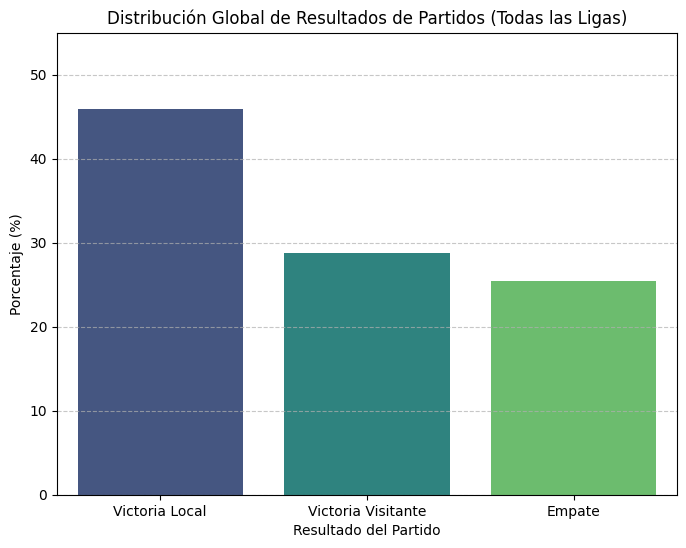

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if df_merged is not None:
    # Calcular el porcentaje global de cada resultado
    resultados_globales = df_merged['Resultado'].value_counts(normalize=True) * 100
    print("\nPorcentaje global de resultados de partidos (todo el dataset):")
    print(resultados_globales)

    # Visualización: Gráfico de Barras para la Distribución Global
    plt.figure(figsize=(8, 6))
    sns.barplot(x=resultados_globales.index, y=resultados_globales.values, palette='viridis')
    plt.title('Distribución Global de Resultados de Partidos (Todas las Ligas)')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel('Resultado del Partido')
    plt.ylim(0, 55) # Ajustar el límite y para mejor visualización
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("df_merged no está disponible. Saltando Análisis de Distribución Global.")


Porcentaje de resultados por liga (ordenado por Victoria Local):
Resultado                 Victoria Local     Empate  Victoria Visitante
Liga                                                                   
Spain LIGA BBVA                48.848684  23.157895           27.993421
Netherlands Eredivisie         47.834967  23.733660           28.431373
Belgium Jupiler League         46.875000  24.594907           28.530093
Italy Serie A                  46.635731  26.383825           26.980444
England Premier League         45.723684  25.756579           28.519737
Switzerland Super League       45.710267  24.331927           29.957806
Poland Ekstraklasa             45.312500  27.343750           27.343750
Germany 1. Bundesliga          45.220588  24.387255           30.392157
France Ligue 1                 44.703947  28.256579           27.039474
Portugal Liga ZON Sagres       44.249513  25.974659           29.775828
Scotland Premier League        41.666667  24.506579           33.82675

<Figure size 1400x800 with 0 Axes>

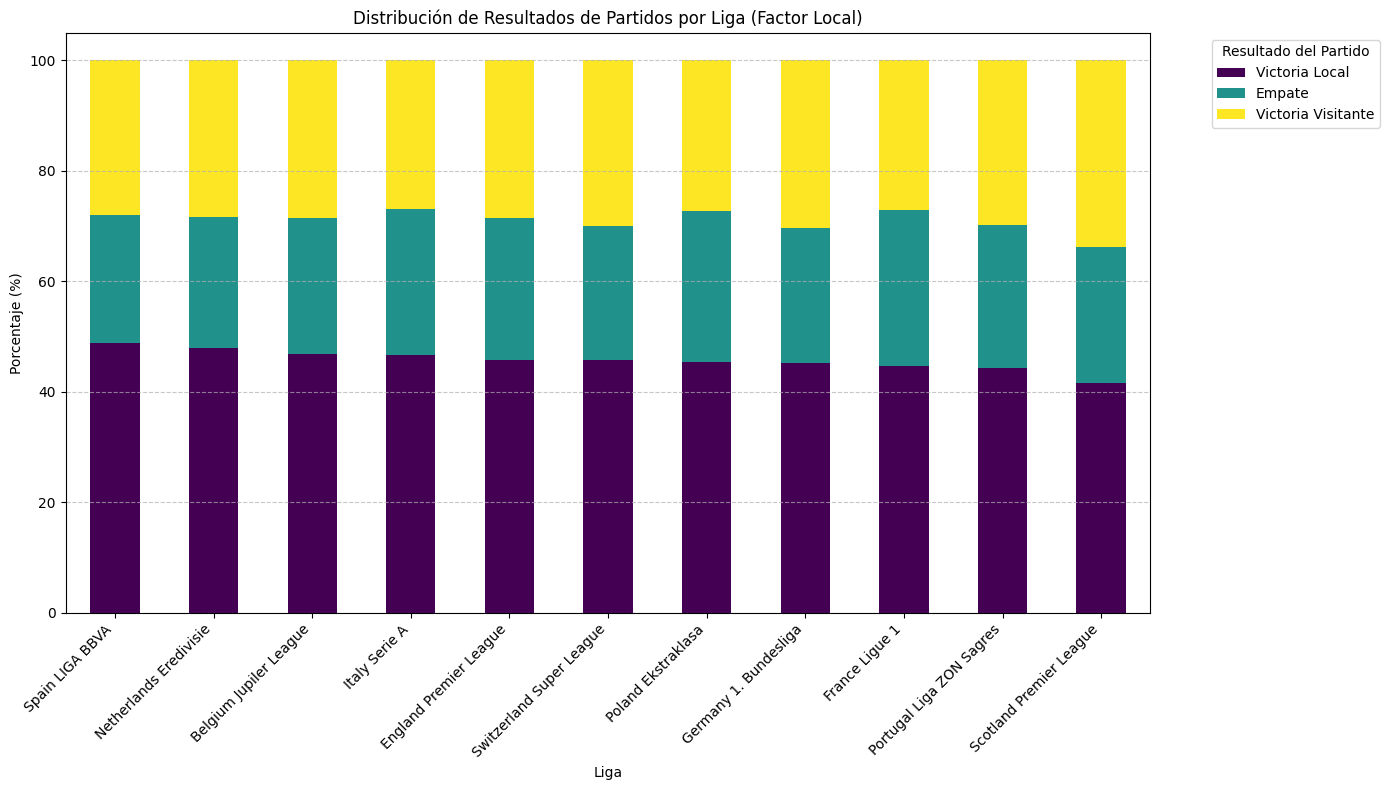

In [ ]:
if df_merged is not None:
    # Calcular el porcentaje de cada resultado para cada liga
    # Usamos .unstack() para pivotar la tabla y fill_value=0 para los casos donde no haya un tipo de resultado específico
    resultados_por_liga = df_merged.groupby('Liga')['Resultado'].value_counts(normalize=True).unstack(fill_value=0) * 100

    # Asegurar el orden de las columnas para la visualización (Victoria Local, Empate, Victoria Visitante)
    column_order = ['Victoria Local', 'Empate', 'Victoria Visitante']
    # Asegurarse de que todas las columnas existan antes de reordenar
    for col in column_order:
        if col not in resultados_por_liga.columns:
            resultados_por_liga[col] = 0
    resultados_por_liga = resultados_por_liga[column_order]

    # Opcional: Ordenar las ligas por el porcentaje de 'Victoria Local' de mayor a menor
    resultados_por_liga = resultados_por_liga.sort_values(by='Victoria Local', ascending=False)

    print("\nPorcentaje de resultados por liga (ordenado por Victoria Local):")
    print(resultados_por_liga)

    # Visualización: Gráfico de Barras Apiladas por Liga
    plt.figure(figsize=(14, 8))
    resultados_por_liga.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
    plt.title('Distribución de Resultados de Partidos por Liga (Factor Local)')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel('Liga')
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad
    plt.legend(title='Resultado del Partido', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout() # Ajustar el diseño para que no se superpongan las etiquetas
    plt.show()
else:
    print("df_merged no está disponible. Saltando Análisis de Ventaja Local por Liga.")


Diferencia Promedio de Goles (Local - Visitante) por Liga:
Liga
Spain LIGA BBVA             0.495395
Netherlands Eredivisie      0.478758
Belgium Jupiler League      0.417245
Switzerland Super League    0.396624
England Premier League      0.391447
Italy Serie A               0.384819
Poland Ekstraklasa          0.364583
France Ligue 1              0.362829
Germany 1. Bundesliga       0.351716
Portugal Liga ZON Sagres    0.282164
Scotland Premier League     0.224781
Name: Diferencia_Goles, dtype: float64


/tmp/ipython-input-16-2997470272.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diferencia_goles_por_liga.index, y=diferencia_goles_por_liga.values, palette='coolwarm')


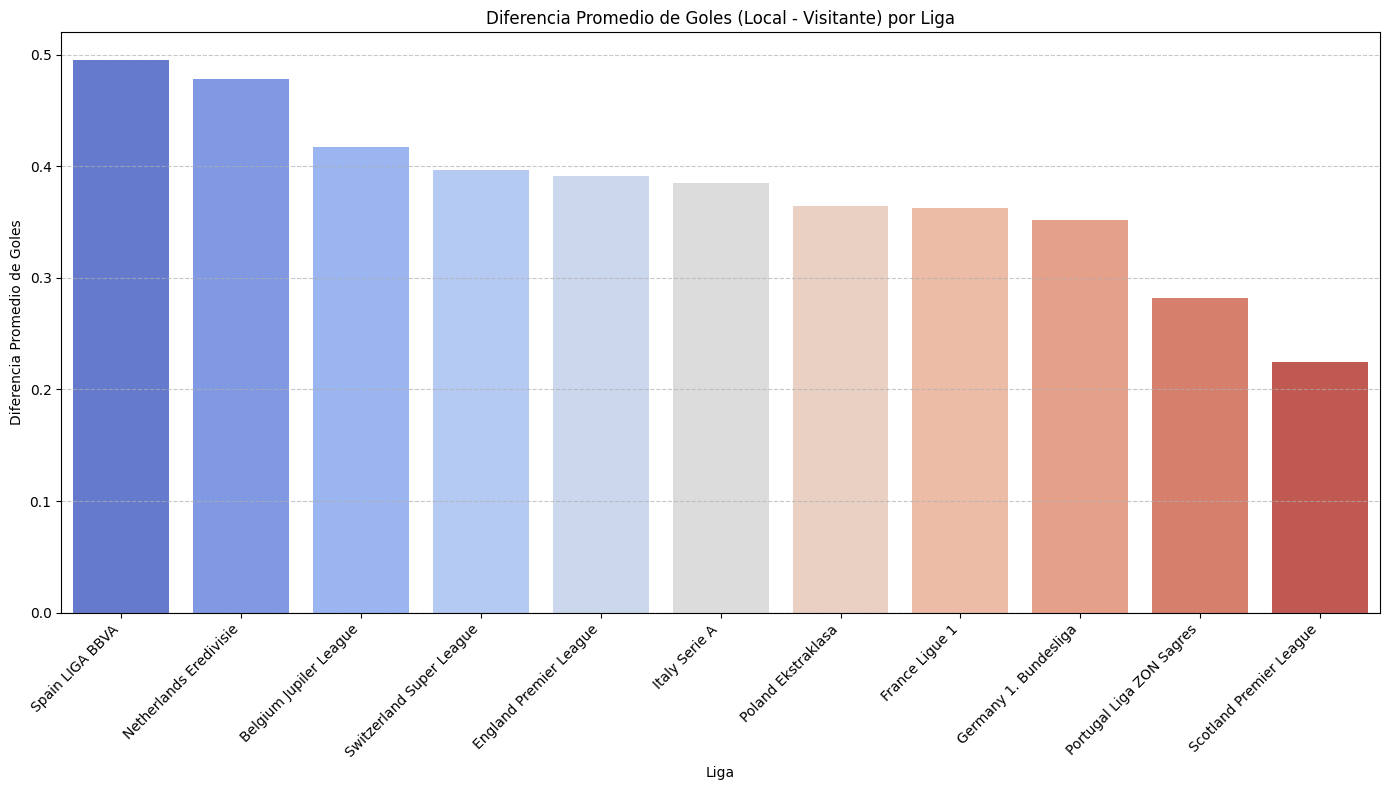

In [ ]:
if df_merged is not None:
    # Calcular la diferencia de goles para cada partido
    df_merged['Diferencia_Goles'] = df_merged['home_team_goal'] - df_merged['away_team_goal']

    # Calcular la diferencia promedio de goles por liga
    diferencia_goles_por_liga = df_merged.groupby('Liga')['Diferencia_Goles'].mean().sort_values(ascending=False)

    print("\nDiferencia Promedio de Goles (Local - Visitante) por Liga:")
    print(diferencia_goles_por_liga)

    # Visualización: Gráfico de Barras Comparativo para Diferencia de Goles Promedio
    plt.figure(figsize=(14, 8))
    sns.barplot(x=diferencia_goles_por_liga.index, y=diferencia_goles_por_liga.values, palette='coolwarm')
    plt.title('Diferencia Promedio de Goles (Local - Visitante) por Liga')
    plt.ylabel('Diferencia Promedio de Goles')
    plt.xlabel('Liga')
    plt.xticks(rotation=45, ha='right')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Añadir una línea en 0 para referencia
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("df_merged no está disponible. Saltando Análisis de Diferencia de Goles.")


Puntos Promedio Obtenidos por Partido (Local vs. Visitante) por Liga:
                          Puntos_Promedio_Local  Puntos_Promedio_Visitante
Liga                                                                      
Spain LIGA BBVA                        1.697039                   1.071382
Netherlands Eredivisie                 1.672386                   1.090278
Italy Serie A                          1.662910                   1.073252
Belgium Jupiler League                 1.652199                   1.101852
Poland Ekstraklasa                     1.632812                   1.093750
England Premier League                 1.629276                   1.113158
France Ligue 1                         1.623684                   1.093750
Switzerland Super League               1.614627                   1.142053
Germany 1. Bundesliga                  1.600490                   1.155637
Portugal Liga ZON Sagres               1.587232                   1.153021
Scotland Premier League      

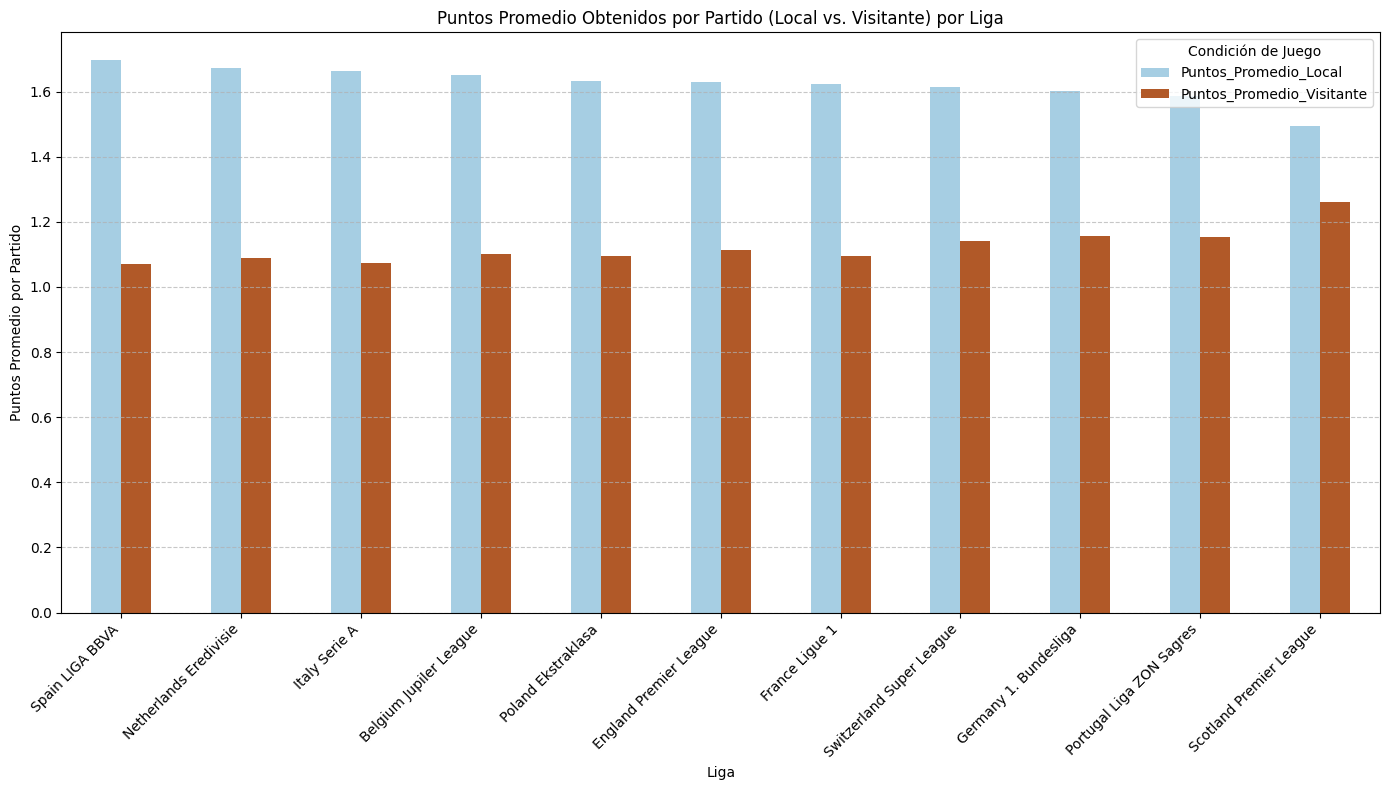

In [ ]:
if df_merged is not None:
    # Función para calcular los puntos por partido (3 por victoria, 1 por empate, 0 por derrota)
    def calculate_points_per_match(home_goal, away_goal, is_home_team):
        if is_home_team:
            if home_goal > away_goal:
                return 3
            elif home_goal == away_goal:
                return 1
            else:
                return 0
        else: # is_away_team
            if away_goal > home_goal:
                return 3
            elif away_goal == home_goal:
                return 1
            else:
                return 0

    # Aplicar la función para calcular puntos para el equipo local y el visitante
    df_merged['Puntos_Local_Partido'] = df_merged.apply(lambda row: calculate_points_per_match(row['home_team_goal'], row['away_team_goal'], True), axis=1)
    df_merged['Puntos_Visitante_Partido'] = df_merged.apply(lambda row: calculate_points_per_match(row['home_team_goal'], row['away_team_goal'], False), axis=1)

    # Calcular los puntos promedio obtenidos por partido (local vs. visitante) por liga
    puntos_promedio_por_liga = df_merged.groupby('Liga').agg(
        Puntos_Promedio_Local=('Puntos_Local_Partido', 'mean'),
        Puntos_Promedio_Visitante=('Puntos_Visitante_Partido', 'mean')
    ).sort_values(by='Puntos_Promedio_Local', ascending=False)

    print("\nPuntos Promedio Obtenidos por Partido (Local vs. Visitante) por Liga:")
    print(puntos_promedio_por_liga)

    # Visualización: Gráfico de Barras Agrupadas para Puntos Promedio
    puntos_promedio_por_liga.plot(kind='bar', figsize=(14, 8), colormap='Paired')
    plt.title('Puntos Promedio Obtenidos por Partido (Local vs. Visitante) por Liga')
    plt.ylabel('Puntos Promedio por Partido')
    plt.xlabel('Liga')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Condición de Juego')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("df_merged no está disponible. Saltando Análisis de Puntos Promedio.")

### Distribución de Resultados por Liga

Para analizar cómo varía la ventaja de local entre las diferentes ligas europeas, el siguiente gráfico de barras apiladas muestra la distribución porcentual de los resultados (Victoria Local, Empate, Victoria Visitante) para cada liga. Cada barra representa una liga, y los segmentos apilados dentro de ella muestran la proporción de partidos que terminaron en victoria local, empate o victoria visitante.

Esta visualización es crucial para identificar qué ligas exhiben una mayor o menor proporción de victorias locales en comparación con el promedio global y entre sí. Una proporción más alta de victorias locales sugiere una mayor influencia del "factor local" en esa liga particular.

**Hallazgos Clave del Gráfico:**

Basándonos en el gráfico y la tabla de porcentajes generados por el código anterior, podemos observar que:

*   **La Victoria Local es el resultado más común en casi todas las ligas**, lo que confirma la existencia general de una ventaja de jugar en casa en el fútbol europeo.
*   Ligas como la **Spain LIGA BBVA** y **Netherlands Eredivisie** muestran los porcentajes más altos de Victorias Locales (aproximadamente 48.8% y 47.8% respectivamente), sugiriendo que el factor local podría ser ligeramente más pronunciado en estas competiciones.
*   Por otro lado, ligas como la **Scotland Premier League** tienen el porcentaje más bajo de Victorias Locales (aproximadamente 41.7%), y un porcentaje notablemente más alto de Victorias Visitantes (aproximadamente 33.8%) en comparación con otras ligas, lo que podría indicar una ventaja de local menos marcada.
*   Los **Empates** tienden a tener una distribución más consistente entre las ligas, generalmente fluctuando entre el 23% y el 28%.
*   Las **Victorias Visitantes** varían más que los empates, pero generalmente se sitúan entre el 27% y el 34%, siendo la Scotland Premier League la que registra la mayor proporción.

En resumen, mientras que la ventaja de local es una tendencia general en Europa, su intensidad parece variar ligeramente entre las ligas, con algunas (como España y Países Bajos) mostrando una proporción de victorias locales un poco mayor que otras (como Escocia).

### Diferencia Promedio de Goles por Liga

Otra forma de cuantificar la ventaja de jugar en casa es analizando la diferencia promedio de goles entre el equipo local y el equipo visitante para cada liga. Un valor positivo en esta métrica indica que, en promedio, los equipos locales anotan más goles que los visitantes en esa liga. Esta visualización nos proporciona una medida directa de la "ventaja ofensiva" que los equipos locales disfrutan en diferentes competiciones. El gráfico de barras a continuación muestra esta diferencia promedio de goles por liga, ordenado de mayor a menor ventaja ofensiva local.

**Hallazgos Clave del Gráfico:**

Observando el gráfico y los valores de la diferencia promedio de goles generados por el código anterior, podemos notar lo siguiente:

*   Todas las ligas muestran una **diferencia promedio de goles positiva**, lo que refuerza la conclusión de que los equipos locales tienden a marcar más goles que sus oponentes visitantes.
*   La **Spain LIGA BBVA** y la **Netherlands Eredivisie** nuevamente lideran con las mayores diferencias promedio de goles (aproximadamente 0.50 y 0.48 respectivamente), lo que sugiere que la ventaja ofensiva del local es particularmente fuerte en estas ligas.
*   Ligas como la **Scotland Premier League** y la **Portugal Liga ZON Sagres** presentan las menores diferencias promedio de goles (aproximadamente 0.22 y 0.28 respectivamente), indicando una ventaja ofensiva local menos pronunciada en comparación con las ligas superiores.
*   La mayoría de las ligas se agrupan en un rango de diferencia promedio de goles entre 0.35 y 0.42.

Estos resultados complementan el análisis de la distribución de resultados, confirmando que la ventaja de local no solo se traduce en una mayor probabilidad de victoria, sino también en una superioridad ofensiva medida por la diferencia de goles. La variación entre ligas en esta métrica subraya que el impacto del factor local no es uniforme en todo el fútbol europeo.

### Puntos Promedio Obtenidos por Partido (Local vs. Visitante) por Liga

Finalmente, para medir la ventaja de local en términos del resultado más tangible en una competición de liga (los puntos obtenidos), el siguiente gráfico de barras agrupadas compara los puntos promedio que los equipos obtienen por partido cuando juegan en casa frente a cuando juegan como visitantes, desglosado por cada liga. Un equipo obtiene 3 puntos por victoria, 1 por empate y 0 por derrota. Comparar los promedios de puntos locales y visitantes nos da una idea clara de cuánto impacta la condición de local en la capacidad de un equipo para sumar puntos en la tabla.

**Hallazgos Clave del Gráfico:**

El análisis de los puntos promedio por partido por liga, basado en el gráfico y la tabla `puntos_promedio_por_liga` del código anterior, revela consistentemente la ventaja de local:

*   En **todas las ligas**, los equipos obtienen, en promedio, significativamente **más puntos por partido cuando juegan en casa** que cuando juegan como visitantes.
*   Las ligas como la **Spain LIGA BBVA** y la **Netherlands Eredivisie** muestran los promedios de puntos locales más altos (aproximadamente 1.70 y 1.67 respectivamente), lo que se alinea con los hallazgos previos sobre la alta proporción de victorias locales y la diferencia de goles.
*   La **Scotland Premier League** presenta el promedio de puntos local más bajo (aproximadamente 1.50) y el promedio de puntos visitante más alto (aproximadamente 1.26), resultando en la menor diferencia absoluta entre puntos locales y visitantes. Esto refuerza la idea de que la ventaja de local es menos pronunciada en esta liga.
*   La diferencia entre los puntos promedio locales y visitantes varía entre las ligas, lo que cuantifica la magnitud de la ventaja de local en términos de impacto en la clasificación. Las ligas con mayor diferencia en esta métrica (como España y Países Bajos) son aquellas donde jugar en casa parece ofrecer una ventaja más sustancial para sumar puntos.

Esta métrica de puntos promedio por partido ofrece una perspectiva práctica de la ventaja de local, mostrando cuánto más efectivos son los equipos sumando puntos frente a su afición en comparación con sus desplazamientos. La consistencia de esta ventaja en todas las ligas, aunque con variación en su magnitud, subraya su importancia estratégica en el fútbol de liga.

## Resumen:

### Hallazgos clave

* El análisis demuestra consistentemente una ventaja local en todas las ligas de fútbol europeas en el conjunto de datos, manifestada a través de mayores porcentajes de victorias locales, diferencias de goles promedio positivas para los equipos locales y más puntos obtenidos por partido en casa.
* Si bien la ventaja local es universal, su magnitud varía según la liga. Futuros análisis podrían explorar factores potenciales que contribuyen a estas variaciones, como la competitividad de la liga, el tamaño/ambiente del estadio, las distancias de viaje, entre otros.

## Visualización Geográfica

Para complementar el análisis, incluimos mapas para visualizar datos geográficos.

Usaremos la ubicación de los equipos (por ejemplo, ciudades sede) para mostrar métricas como:
- Total de partidos jugados en casa
- Porcentaje de victorias como local

Esto permite analizar cómo la ventaja local puede variar entre distintas regiones o ligas.

A continuación, creamos un mapa interactivo:


In [5]:
!pip install folium geopy


In [14]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium

# Dataset ligas y porcentaje de victorias locales
leagues = pd.DataFrame({
    'league_name': [
        'Spain LIGA BBVA',
        'Netherlands Eredivisie',
        'Belgium Jupiler League',
        'Italy Serie A',
        'England Premier League',
        'Switzerland Super League',
        'Poland Ekstraklasa',
        'Germany 1. Bundesliga',
        'France Ligue 1',
        'Portugal Liga ZON Sagres',
        'Scotland Premier League'
    ],
    'home_win_percentage': [
        48.848684, 47.834967, 46.875000, 46.635731, 45.723684,
        45.710267, 45.312500, 45.220588, 44.703947, 44.249513, 41.666667
    ],
    'country': [
        'Spain', 'Netherlands', 'Belgium', 'Italy', 'England',
        'Switzerland', 'Poland', 'Germany', 'France', 'Portugal', 'Scotland'
    ]
})

# Geocodificación automática
geolocator = Nominatim(user_agent="soccer_leagues_geocoder")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
leagues['location'] = leagues['country'].apply(geocode)
leagues['latitude'] = leagues['location'].apply(lambda loc: loc.latitude if loc else None)
leagues['longitude'] = leagues['location'].apply(lambda loc: loc.longitude if loc else None)

# Crear el mapa
m = folium.Map(location=[50, 10], zoom_start=4)

# Añadir marcadores
for _, row in leagues.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=max(5, row['home_win_percentage'] / 2),  # Ajusta tamaño
        popup=(
            f"Liga: {row['league_name']}<br>"
            f"Porcentaje de Victorias Locales: {row['home_win_percentage']:.2f}%"
        ),
        color='blue',
        fill=True,
        fill_color='cyan'
    ).add_to(m)

# Mostrar el mapa
from IPython.display import display
display(m)


## Propuesta de Modelo Predictivo del Resultado del Partido

Para analizar la influencia de jugar en casa, desarrollaremos modelos predictivos para predecir el **resultado del partido**:
- **1:** Victoria Local
- **0:** Empate
- **-1:** Victoria Visitante

Las variables que usaremos como predictores serán:
- Goles del equipo local
- Goles del equipo visitante

Construiremos dos modelos supervisados:
1. **Regresión Logística**
2. **Árbol de Decisión**

Este análisis tiene como objetivo determinar si estas variables permiten anticipar el resultado de los partidos.
